# PART1 :
# DOMAIN: 
## Electronics and Telecommunication
## CONTEXT: 
A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a
machine learning model which can help the company to predict the equipment’s signal quality using various parameters.
## DATA DESCRIPTION: 
The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

## PROJECT OBJECTIVE: 
The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number].

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# %tensorflow_version 2.x
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Dropout
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras import regularizers      
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import accuracy_score
from tensorflow.keras import regularizers, optimizers



# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### 1. Import data

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# Import Data
data = pd.read_csv("/content/drive/MyDrive/NN/Part- 1 - Signal.csv")

# explore shape and size of each
print(data.size,data.shape)

# Print the Data
data.head()

19188 (1599, 12)


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2. Data analysis & visualisation

In [17]:
data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
data.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [19]:
# Explore for null values
data.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

#### Univariate Analysis

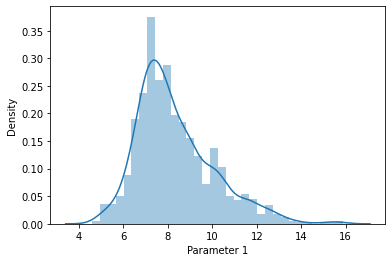

In [20]:
sns.distplot(data['Parameter 1'])

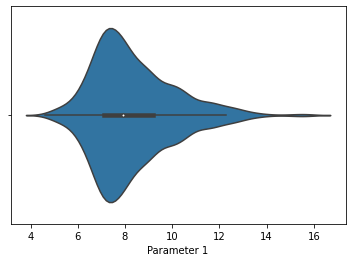

In [21]:
sns.violinplot(data['Parameter 1'])

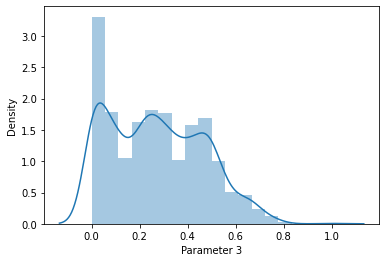

In [22]:
sns.distplot(data['Parameter 3'])

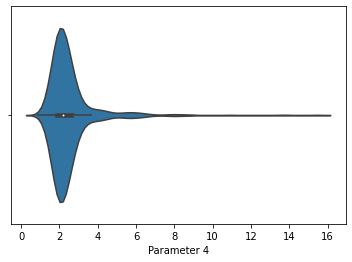

In [23]:
sns.violinplot(data['Parameter 4'])

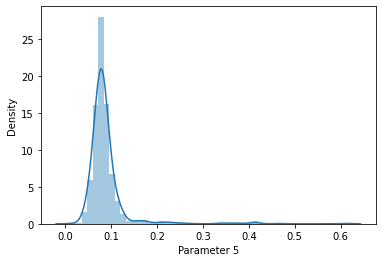

In [24]:
sns.distplot(data['Parameter 5'])

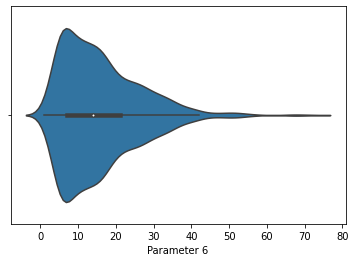

In [25]:
sns.violinplot(data['Parameter 6'])

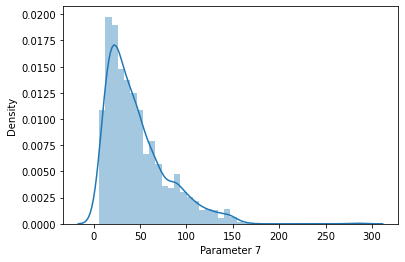

In [26]:
sns.distplot(data['Parameter 7'])

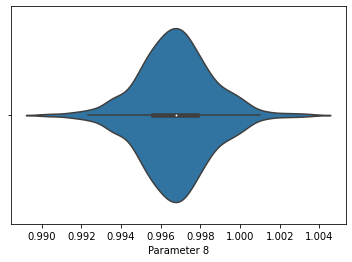

In [27]:
sns.violinplot(data['Parameter 8'])

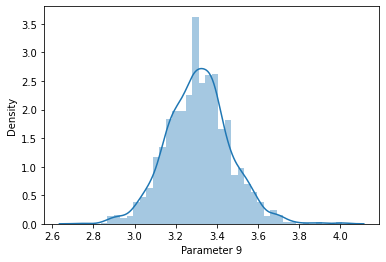

In [28]:
sns.distplot(data['Parameter 9'])

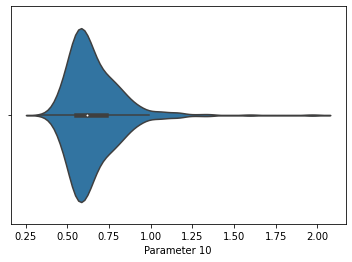

In [29]:
sns.violinplot(data['Parameter 10'])

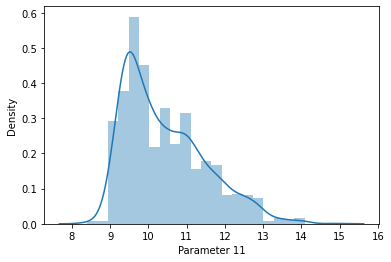

In [30]:
sns.distplot(data['Parameter 11'])

#### Bivariate Analysis

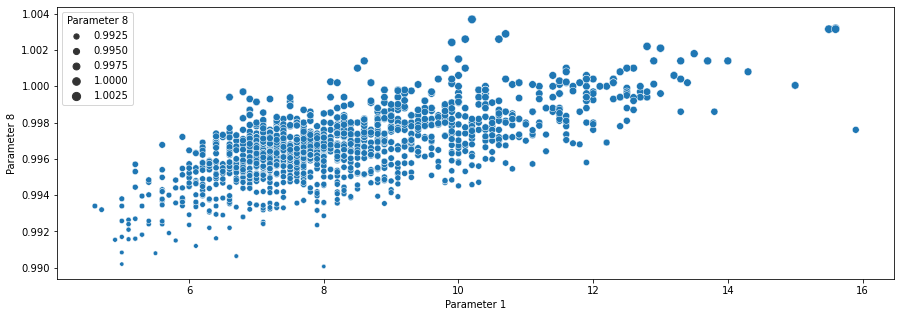

In [31]:
# scatter plot
figure = plt.figure(figsize=(15,5))
ax = sns.scatterplot(x=data['Parameter 1'],y='Parameter 8', data=data, size = "Parameter 8") 

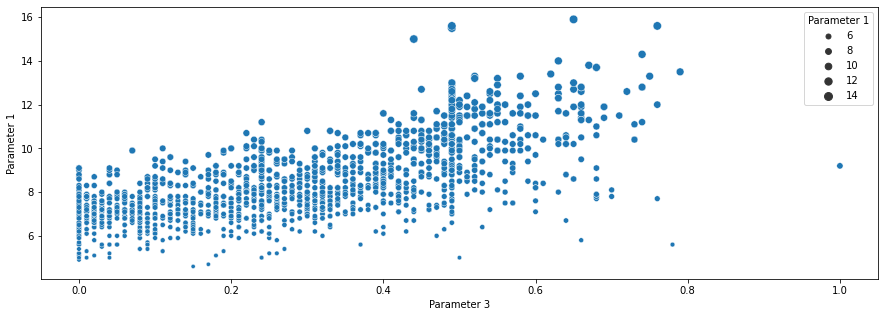

In [32]:
# scatter plot
figure = plt.figure(figsize=(15,5))
ax = sns.scatterplot(x=data['Parameter 3'],y='Parameter 1', data=data, size = "Parameter 1") 

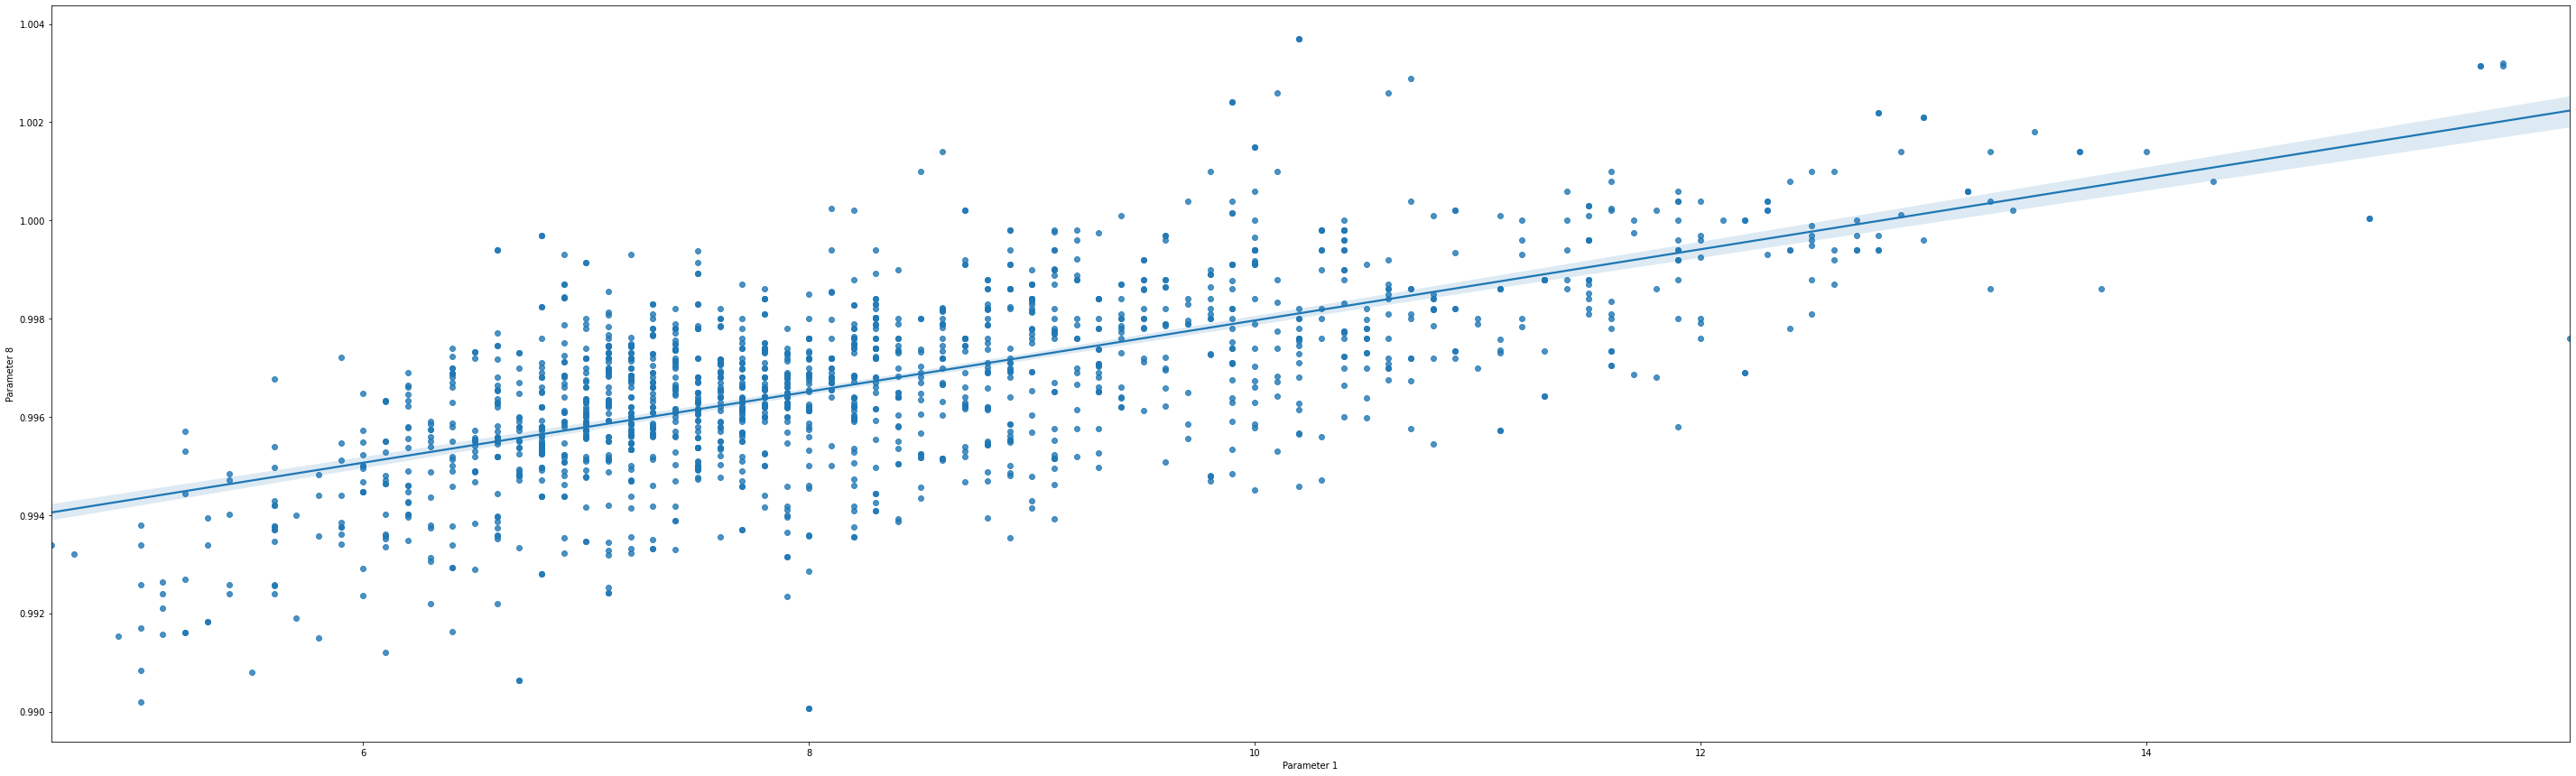

In [33]:
 # regression plot - scatter plot with a regression line
figure = plt.figure(figsize=(50,15))
ax = sns.regplot(x='Parameter 1',y='Parameter 8', data=data )

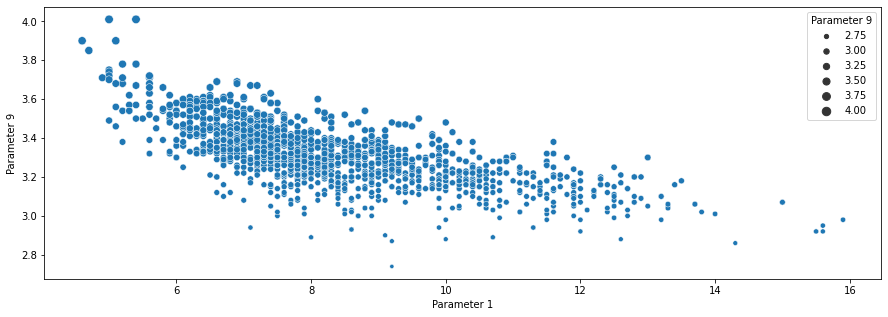

In [34]:
# scatter plot
figure = plt.figure(figsize=(15,5))
ax = sns.scatterplot(x=data['Parameter 1'],y='Parameter 9', data=data, size = "Parameter 9") 

#### Multivariate Analysis

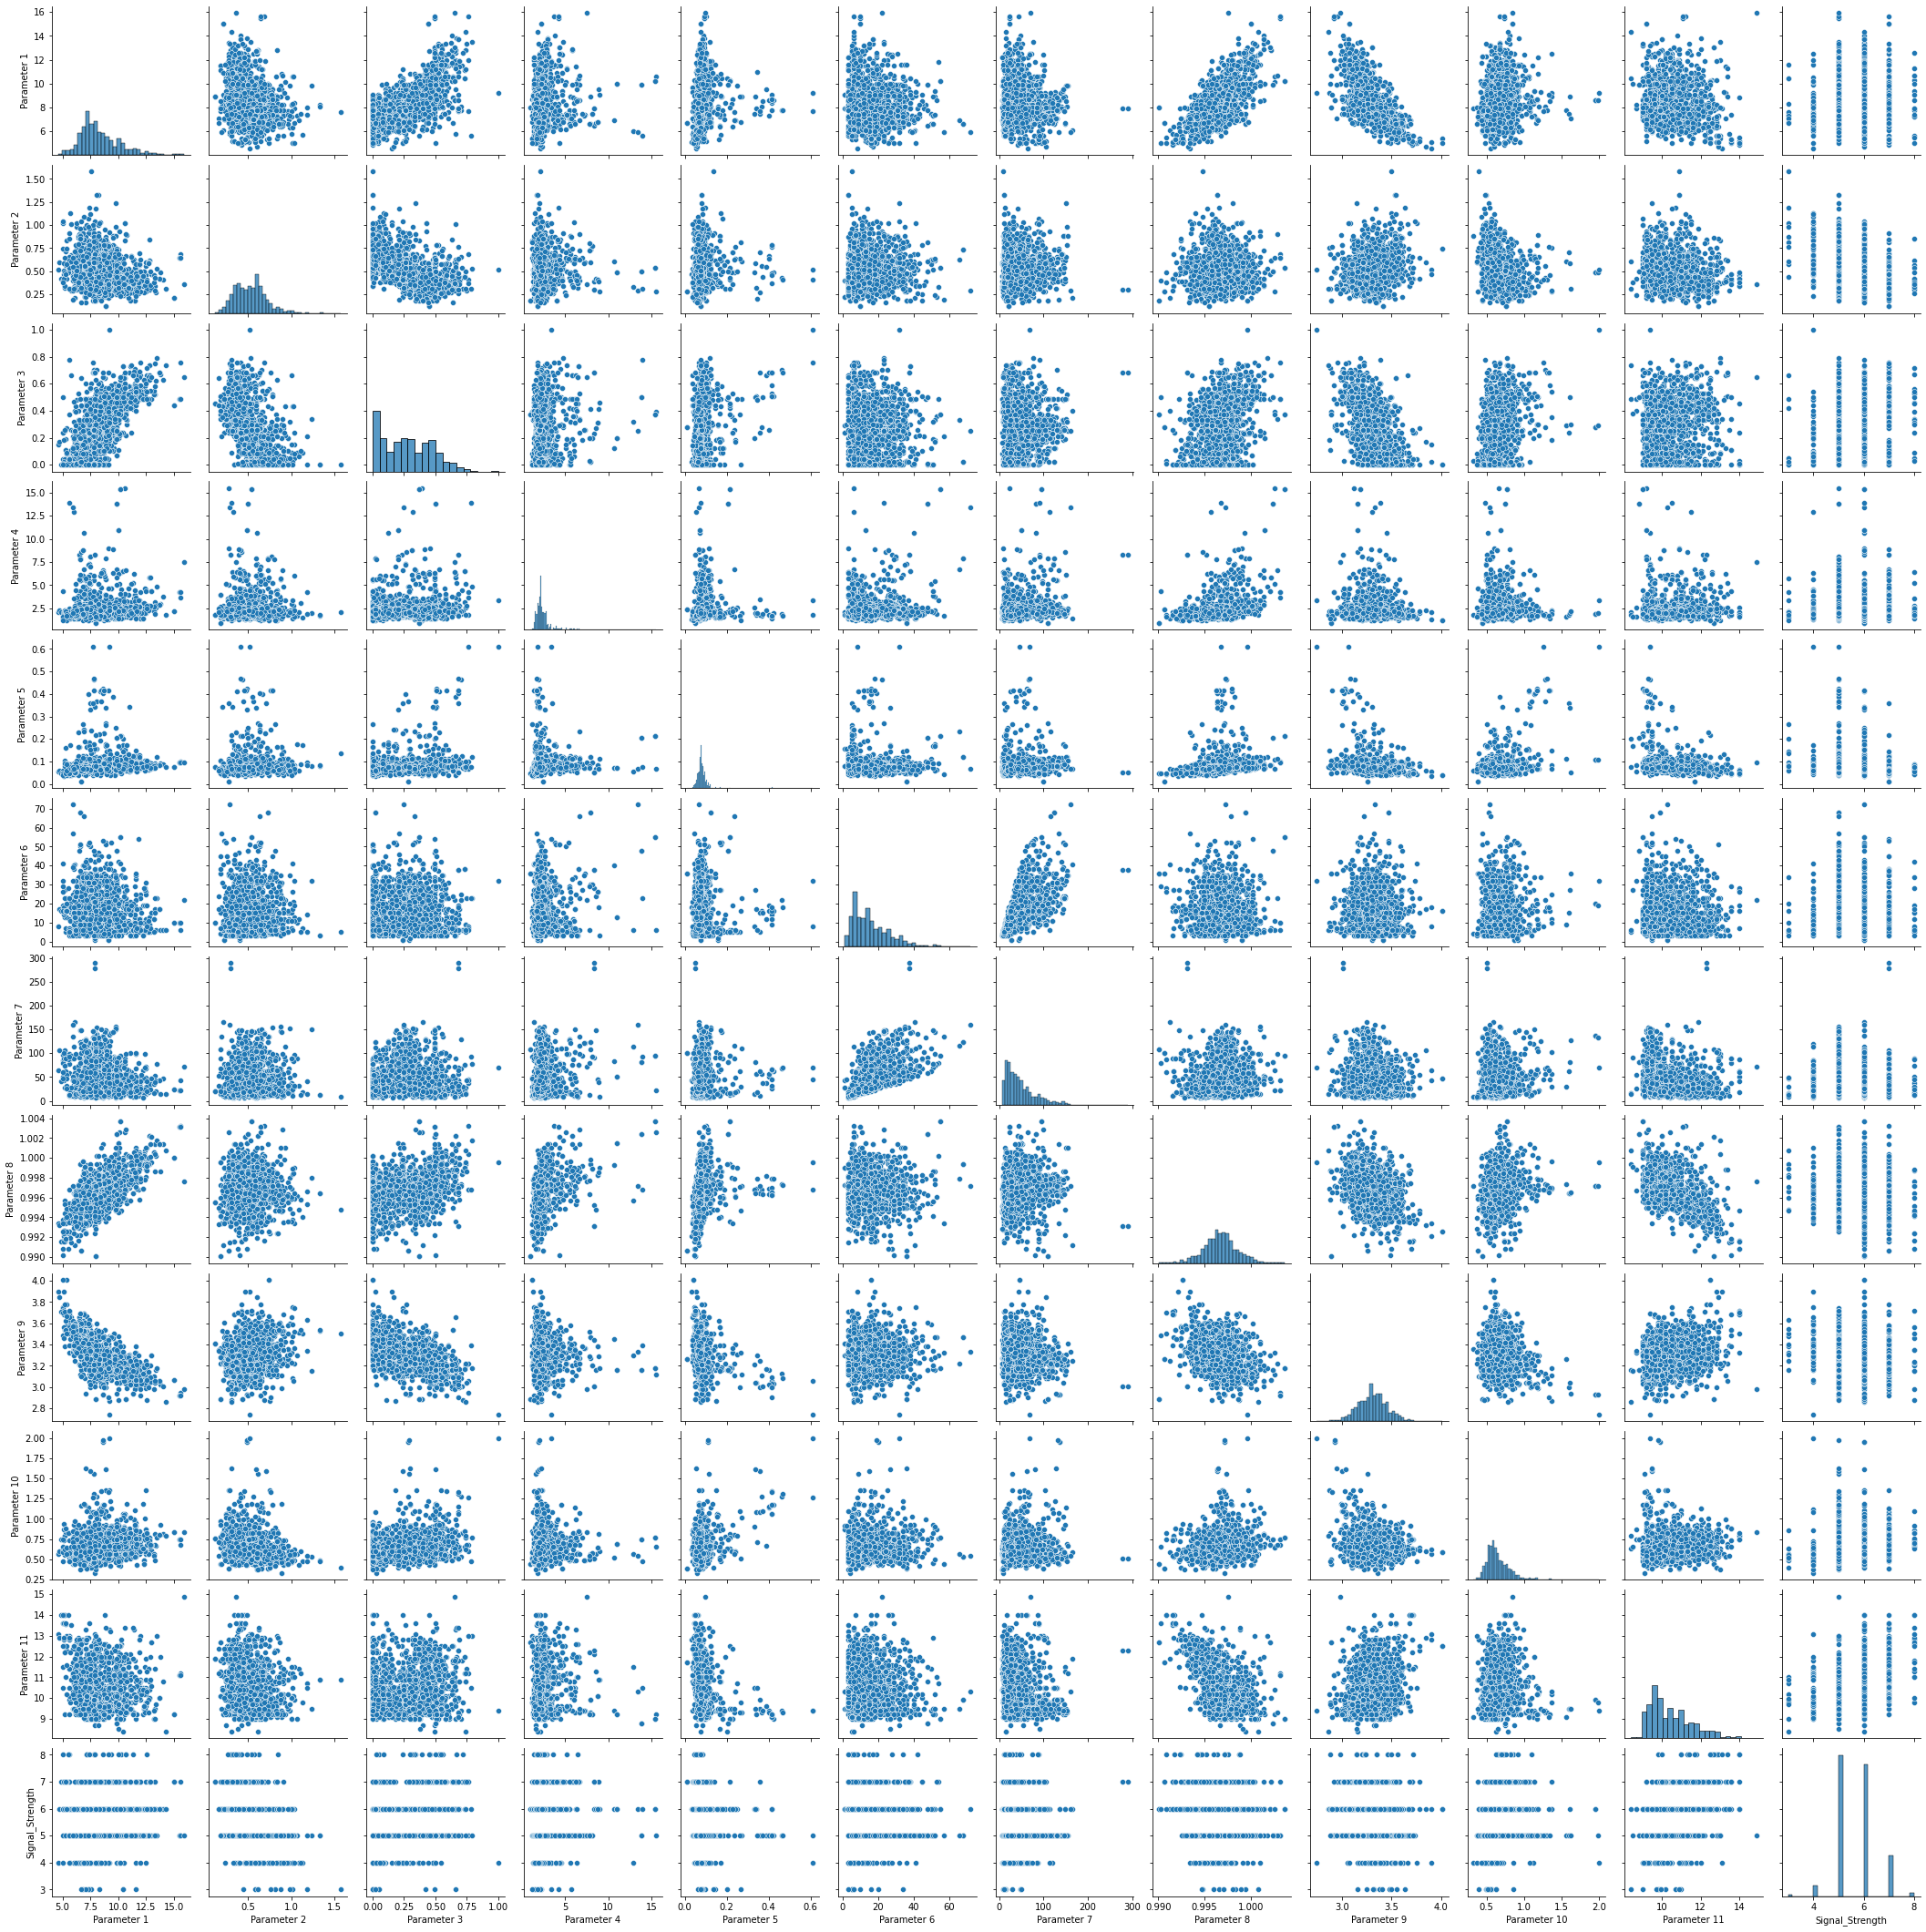

In [35]:
# Plot Pair Plot
sns.pairplot(data)

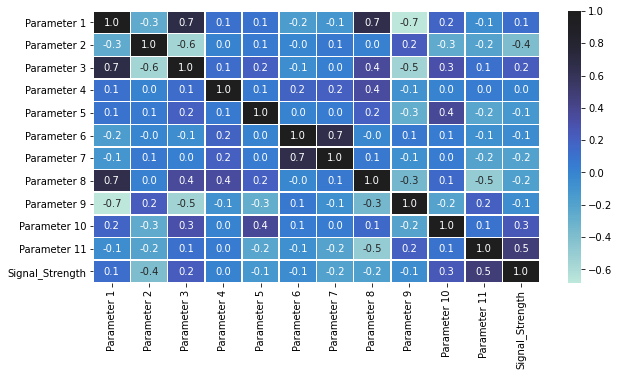

In [36]:
# Plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 ) 
plt.show()

As per above Analysis,

1) Parameter 1 have high correlation with Parameter 3 & 8

2) Parameter 6 have high correlation with Parameter 7

3) Parameter 1 & 9 are weekly correlated

### 3. Design, train, tune and test a neural network regressor.

In [37]:
# Transform data into features and target
x = data.drop('Signal_Strength',axis=1) 
y = data['Signal_Strength']

In [38]:
from sklearn.model_selection import train_test_split
# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=6)

In [39]:
# Initialize Sequential model
model = Sequential()

# Normalize input data
model.add(tf.keras.layers.BatchNormalization(input_shape=(11,)))

# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(1))

In [40]:
# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
model.compile(optimizer='sgd', loss='mse')

In [41]:
model.fit(x_train, y_train, epochs=100, validation_split=0.35)

Epoch 1/100
23/23 [==============================] - 1s 10ms/step - loss: 13.9528 - val_loss: 4.3070
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 2.0812 - val_loss: 2.0629
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 1.1946 - val_loss: 1.3161
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.9338 - val_loss: 0.9823
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.8022 - val_loss: 0.8441
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7018 - val_loss: 0.7696
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6573 - val_loss: 0.7076
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6049 - val_loss: 0.6608
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5774 - val_loss: 0.6539
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5514 - val_loss: 0.5771
Epoch 1

#### Tuning the Hyperparameters using Cross Validation

In [42]:
input_shape = (11, )
# Creates a model given an activation and learning rate
def create_model(learning_rate = 0.01, activation = 'relu'):
  
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=learning_rate)
  
    # Create your binary classification model  
    model = Sequential()
    model.add(Dense(128, 
                    activation = activation,
                    input_shape = input_shape,
                    activity_regularizer = regularizers.l2(1e-5)))
    model.add(Dropout(0.50))
    model.add(Dense(128,
                    activation = activation, 
                    activity_regularizer = regularizers.l2(1e-5)))
    model.add(Dropout(0.50))
    model.add(Dense(1, activation = activation))
# Compile the model
    model.compile(optimizer = opt,
                  loss = "mean_absolute_error",
                  metrics=['mse', "mape"])
    return model

In [43]:
# Create a KerasClassifier object
model = KerasRegressor(build_fn = create_model,
                       verbose = 0)
# Define the hyperparameter space
params = {'activation': ["relu", "tanh"],
          'batch_size': [16, 32, 64], 
          'epochs': [50, 100],
          'learning_rate': [0.01, 0.001, 0.0001]}
# Create a randomize search cv object 
random_search = RandomizedSearchCV(model,
                                   param_distributions = params,
                                   cv = KFold(10))
random_search_results = random_search.fit(x_train, y_train)

In [44]:
print("Best Score: ",
      random_search_results.best_score_,
      "and Best Params: ",
      random_search_results.best_params_)

Best Score:  -0.6615452349185944 and Best Params:  {'learning_rate': 0.01, 'epochs': 100, 'batch_size': 16, 'activation': 'relu'}


In [45]:
input_shape = (11,)
# Create the model object with default arguments
def create_model(learning_rate = 0.01, activation='relu'):
  
    # Set Adam optimizer with the given learning rate
    opt = Adam(lr = learning_rate)
  
    # Create your binary classification model  
    model = Sequential()
    model.add(Dense(128,
                    activation = activation,
                    input_shape = input_shape,
                    activity_regularizer = regularizers.l2(1e-5)))
    model.add(Dropout(0.50))
    model.add(Dense(128,
                    activation = activation, 
                    activity_regularizer = regularizers.l2(1e-5)))
    model.add(Dropout(0.50))
    model.add(Dense(1, activation = activation))
    # Compile the model
    model.compile(optimizer = opt,
                  loss = "mean_absolute_error",
                  metrics = ['mse', "mape"])
    return model

In [46]:
model = KerasRegressor(build_fn = create_model,
                       epochs = 100, 
                       batch_size = 16,
                       verbose = 0)

In [47]:
model.fit(x_train, y_train, validation_split=0.35)

In [48]:
results = model.score(x_test, y_test)

In [49]:
results

-0.6595391035079956

### 4. Pickle the model for future use.

In [50]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

# save weights to HDF5
model.model.save_weights("model.h5")
print("Model saved")

# when you want to retrieve the model: load json and create model
json_file = open('model.json', 'r')
saved_model = json_file.read()
# close the file as good practice
json_file.close()
model_from_json = model_from_json(saved_model)
# load weights into new model
model_from_json.load_weights("model.h5")
print("Model loaded")

Model saved
Model loaded


# PART 2

# DOMAIN: 
Autonomous Vehicles
## BUSINESS CONTEXT: 
A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.

The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address
helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interestto the optical character recognition community.

While OCR on constrained domains like document processing is well studied arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.

The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition
factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors
## DATA DESCRIPTION: 
The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

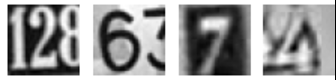

Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset has been provided in the form of h5py files.

## PROJECT OBJECTIVE: 
We will build a digit classifier on the SVHN (Street View Housing Number) dataset.

### 1. Import data

In [51]:
import h5py
data = h5py.File('/content/drive/MyDrive/NN/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5')
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

### 2. Data pre-processing and visualisation.

In [52]:
x_train = data['X_train']
x_val = data['X_val']
x_test = data['X_test']
y_train = data['y_train']
y_val = data['y_val']
y_test = data['y_test']

In [53]:
print('x_train size :', x_train.shape)
print('y_train size :', y_train.shape)

print('x_val size :', x_val.shape)
print('y_val size :', y_val.shape)

print('x_test size :', x_test.shape)
print('y_test size :', y_test.shape)

x_train size : (42000, 32, 32)
y_train size : (42000,)
x_val size : (60000, 32, 32)
y_val size : (60000,)
x_test size : (18000, 32, 32)
y_test size : (18000,)


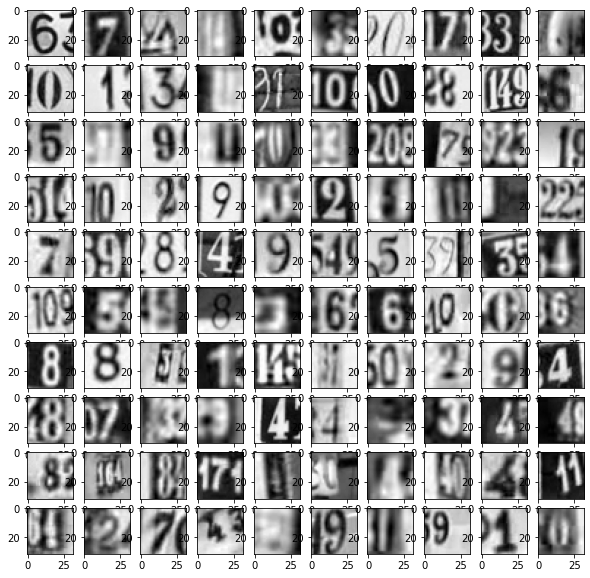

In [54]:
fig=plt.figure(figsize=(10,10))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=x_train[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

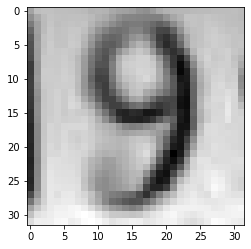

Label:  9


In [55]:
plt.imshow(x_train[45],cmap='gray')    
plt.show()
print('Label: ', y_train[45])

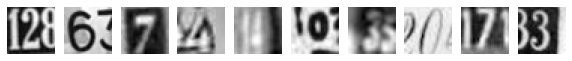

Image label: [2 6 7 4 4 0 3 0 7 3]


In [56]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('Image label: %s' % (y_train[0:10]))

In [57]:
# RESHAPE 2D - 32*32 into 1D - 1024
x_train = np.asarray(x_train).reshape(42000,1024)
x_test = np.asarray(x_test).reshape(18000,1024)
x_val = np.asarray(x_val).reshape(60000,1024)

print('x_train size :', x_train.shape)
print('x_val size :', x_val.shape)
print('x_test size :', x_test.shape)

x_train size : (42000, 1024)
x_val size : (60000, 1024)
x_test size : (18000, 1024)


In [58]:
print(f'Min value for Train = {x_train.min()},Validation ={x_val.min()}, Test = {x_test.min()} ')
print(f'Max value for Train = {x_train.max()},Validation ={x_val.max()}, Test = {x_test.max()} ')

Min value for Train = 0.0,Validation =0.0, Test = 0.0 
Max value for Train = 254.97450256347656,Validation =254.97450256347656, Test = 254.97450256347656 


In [59]:
print('Before Normalization')
print(f'Min value is {x_train.min()}')
print(f'Max value is {x_train.max()}\n')
maxVal=x_train.max()
x_train = x_train/maxVal
x_val= x_val/maxVal
x_test = x_test/maxVal

print('After Normalization')
print(f'Min value is {x_train.min()}')
print(f'Max value is {x_train.max()}')

Before Normalization
Min value is 0.0
Max value is 254.97450256347656

After Normalization
Min value is 0.0
Max value is 1.0


In [60]:
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

In [61]:
print(y_train[:1])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Label for image at index 1 is 2
Label for image at index 2 is 6
Label for image at index 3 is 7
Label for image at index 4 is 4
Label for image at index 5 is 4
Label for image at index 6 is 0
Label for image at index 7 is 3
Label for image at index 8 is 0
Label for image at index 9 is 7
Label for image at index 10 is 3


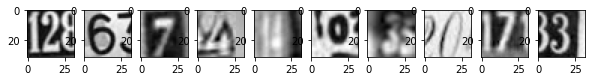

In [62]:
#cross check if we did all right
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i].reshape(32,32),cmap='gray')
    print(f'Label for image at index {i+1} is {np.argmax(y_train[0:10][i])}')

### 3. Design, train, tune and test a neural network image classifier

In [63]:
epochs=27 # 60
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [64]:
# build the model
input_dim = x_train.shape[1]

lr_model = Sequential()
lr_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='uniform', 
                input_dim = input_dim)) 
lr_model.add(Dropout(0.1))
lr_model.add(Dense(64, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(num_classes, kernel_initializer='uniform', activation=tf.nn.softmax))

# compile the model
lr_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

In [65]:
%%time
# Fit the model
batch_size = int(input_dim/100)

lr_model_history = lr_model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/27
4200/4200 [==============================] - 13s 3ms/step - loss: 2.2492 - acc: 0.1394 - val_loss: 2.0347 - val_acc: 0.2395
Epoch 2/27
4200/4200 [==============================] - 17s 4ms/step - loss: 1.8502 - acc: 0.3131 - val_loss: 1.6240 - val_acc: 0.4375
Epoch 3/27
4200/4200 [==============================] - 12s 3ms/step - loss: 1.6392 - acc: 0.4116 - val_loss: 1.4880 - val_acc: 0.4975
Epoch 4/27
4200/4200 [==============================] - 12s 3ms/step - loss: 1.4977 - acc: 0.4826 - val_loss: 1.3217 - val_acc: 0.5833
Epoch 5/27
4200/4200 [==============================] - 12s 3ms/step - loss: 1.3960 - acc: 0.5258 - val_loss: 1.2427 - val_acc: 0.6071
Epoch 6/27
4200/4200 [==============================] - 17s 4ms/step - loss: 1.3235 - acc: 0.5585 - val_loss: 1.1642 - val_acc: 0.6322
Epoch 7/27
4200/4200 [==============================] - 17s 4ms/step - loss: 1.2738 - acc: 0.5775 - val_loss: 1.1263 - val_acc: 0.6501
Epoch 8/27
4200/4200 [==============================] -

#### 4. Plot the training loss, validation loss vs number of epochs and raining accuracy, validation accuracy vs number of epochs plot

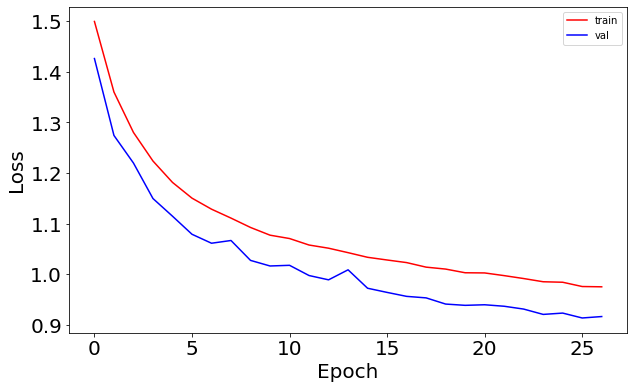

In [66]:
# Plot the graph of Traing & Validation Loss vs Epoch

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

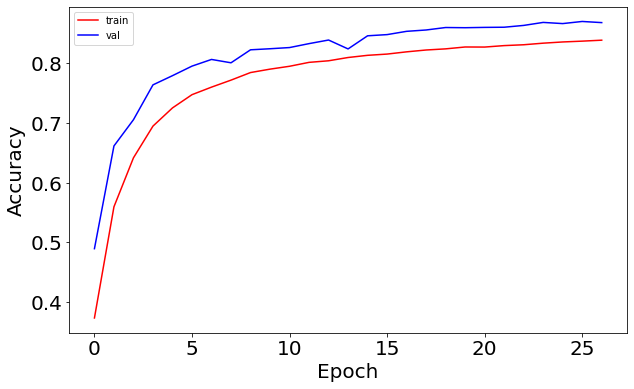

In [67]:
# Plot the graph of Traing & Validation Loss vs Epoch

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['acc']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

As Per Above 2 Graphs, we can say that -

1) increasing no. of epoch reduces the loss & Increasing the Accuracy.

2) Initially Loss is 1.5 & Accuracy is 0.4

3) After 25 epoch loss reduce to 1 & Accuracy Increase to 0.8

#### Tuning the Hyperparameters using Cross Validation

In [68]:
# repeat some of the initial values here so we make sure they were not changed
input_dim = x_train.shape[1]
num_classes = 10

# let's create a function that creates the model (required for KerasClassifier) 
# while accepting the hyperparameters we want to tune 
# we also pass some default values such as optimizer='rmsprop'
def create_model_2(optimizer='rmsprop', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, kernel_initializer=init, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init, activation=tf.nn.relu))
    model.add(Dense(num_classes, kernel_initializer=init, activation=tf.nn.softmax))

    # compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])

    return model

In [69]:
%%time
# fix random seed for reproducibility (this might work or might not work 
# depending on each library's implenentation)
seed = 7
np.random.seed(seed)

# create the sklearn model for the network
model_init_batch_epoch_CV = KerasClassifier(build_fn=create_model_2, verbose=1)

# we choose the initializers that came at the top in our previous cross-validation!!
init_mode = ['glorot_uniform', 'uniform'] 
batches = [128, 512]
epochs = [10, 20]

# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches, init=init_mode)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)
grid_result = grid.fit(x_train, y_train)

Epoch 1/10
219/219 [==============================] - 2s 5ms/step - loss: 2.3087 - accuracy: 0.1027
Epoch 2/10
219/219 [==============================] - 1s 5ms/step - loss: 2.2758 - accuracy: 0.1201
Epoch 3/10
219/219 [==============================] - 1s 5ms/step - loss: 2.2297 - accuracy: 0.1557
Epoch 4/10
219/219 [==============================] - 1s 5ms/step - loss: 2.1656 - accuracy: 0.1837
Epoch 5/10
219/219 [==============================] - 1s 5ms/step - loss: 2.1343 - accuracy: 0.1939
Epoch 6/10
219/219 [==============================] - 1s 4ms/step - loss: 2.1110 - accuracy: 0.2015
Epoch 7/10
219/219 [==============================] - 1s 4ms/step - loss: 2.0654 - accuracy: 0.2207
Epoch 8/10
219/219 [==============================] - 1s 4ms/step - loss: 2.0309 - accuracy: 0.2320
Epoch 9/10
219/219 [==============================] - 1s 4ms/step - loss: 2.0058 - accuracy: 0.2420
Epoch 10/10
110/110 [==============================] - 0s 2ms/step - loss: 1.9408 - accuracy: 0.2660

In [70]:
# print results
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.5448 using {'batch_size': 512, 'epochs': 20, 'init': 'glorot_uniform'}
mean=0.3809, std=0.08159 using {'batch_size': 128, 'epochs': 10, 'init': 'glorot_uniform'}
mean=0.4067, std=0.02118 using {'batch_size': 128, 'epochs': 10, 'init': 'uniform'}
mean=0.5338, std=0.03965 using {'batch_size': 128, 'epochs': 20, 'init': 'glorot_uniform'}
mean=0.4299, std=0.1169 using {'batch_size': 128, 'epochs': 20, 'init': 'uniform'}
mean=0.4609, std=0.01413 using {'batch_size': 512, 'epochs': 10, 'init': 'glorot_uniform'}
mean=0.3681, std=0.04679 using {'batch_size': 512, 'epochs': 10, 'init': 'uniform'}
mean=0.5448, std=0.02172 using {'batch_size': 512, 'epochs': 20, 'init': 'glorot_uniform'}
mean=0.4341, std=0.01303 using {'batch_size': 512, 'epochs': 20, 'init': 'uniform'}


# Thanks !!!